In [71]:
# Mengimport Library yang di butuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Input, Dense, Flatten
from keras.utils import np_utils
import tensorflow as tf

In [72]:
# mengimport datasset yang diperlukan

df = pd.read_csv('./dataset.csv') # Dataset yang berisikan Penyakit berdasarkan beberapa gejala yang dialami
df1 = pd.read_csv('./Symptom-severity.csv') # Dataset yang berisikan nama gejala dan masing-masing bobot gejala
df2 = pd.read_csv('./symptom_Description.csv') # Dataset yang berisikan deskripsi masing-masing penyakit
df3 = pd.read_csv('./symptom_precaution.csv') # Dataset yang berisikan pencegahan dan penangan masing-masing penyakit

In [73]:
# Menampilkan 10 data pertama pada dataset.csv

df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# menampilkan 10 data pertama pada Symptom-severity.csv

df1.head(10)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


In [75]:
# menampilkan 10 data pertama pada symptom_Description.csv

df2.head(10)

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...
5,GERD,"Gastroesophageal reflux disease, or GERD, is a..."
6,Chronic cholestasis,"Chronic cholestatic diseases, whether occurrin..."
7,hepatitis A,Hepatitis A is a highly contagious liver infec...
8,Osteoarthristis,Osteoarthritis is the most common form of arth...
9,(vertigo) Paroymsal Positional Vertigo,Benign paroxysmal positional vertigo (BPPV) is...


In [76]:
df2["Disease"][16] = "Dimorphic hemmorhoids(piles)"

In [77]:
# menampilkan 10 data pertama pada symptom_precaution.csv

df3.head(10)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [78]:
# Menampilkan jumlah penyakti yang ada
print(f"Total Desease: {len(df.Disease.unique())}")

# Menampilkan nama-nama penyakit
print(f"Total Disease: ")
for i in range(len(df.Disease.unique())):
    print(f"{i+1}. {df.Disease.unique()[i]}")

disease_name = df.Disease.unique() # Menyimpan nama-nama penyakit agar dapat dipanggil pada saat prediksi

Total Desease: 41
Total Disease: 
1. Fungal infection
2. Allergy
3. GERD
4. Chronic cholestasis
5. Drug Reaction
6. Peptic ulcer diseae
7. AIDS
8. Diabetes 
9. Gastroenteritis
10. Bronchial Asthma
11. Hypertension 
12. Migraine
13. Cervical spondylosis
14. Paralysis (brain hemorrhage)
15. Jaundice
16. Malaria
17. Chicken pox
18. Dengue
19. Typhoid
20. hepatitis A
21. Hepatitis B
22. Hepatitis C
23. Hepatitis D
24. Hepatitis E
25. Alcoholic hepatitis
26. Tuberculosis
27. Common Cold
28. Pneumonia
29. Dimorphic hemmorhoids(piles)
30. Heart attack
31. Varicose veins
32. Hypothyroidism
33. Hyperthyroidism
34. Hypoglycemia
35. Osteoarthristis
36. Arthritis
37. (vertigo) Paroymsal  Positional Vertigo
38. Acne
39. Urinary tract infection
40. Psoriasis
41. Impetigo


In [79]:
# Menampilkan jumlah unique, top, dan frekuensi tertinggi berdasarkan masing-masing label

df.describe().transpose()

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264
Symptom_8,1944,21,abdominal_pain,276
Symptom_9,1692,22,yellowing_of_eyes,228


In [80]:
# Menampilkan jumlah null data pada masing-masing kolom

null_count = df.apply(lambda x: sum(x.isnull())).to_frame(name = 'jumlah null data')
print(null_count)

            jumlah null data
Disease                    0
Symptom_1                  0
Symptom_2                  0
Symptom_3                  0
Symptom_4                348
Symptom_5               1206
Symptom_6               1986
Symptom_7               2652
Symptom_8               2976
Symptom_9               3228
Symptom_10              3408
Symptom_11              3726
Symptom_12              4176
Symptom_13              4416
Symptom_14              4614
Symptom_15              4680
Symptom_16              4728
Symptom_17              4848


In [81]:
# Menghapus tanda "_" di dataset.csv pada semua nilai di masing-masing kolom menjadi " " (spasi)

for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
    
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


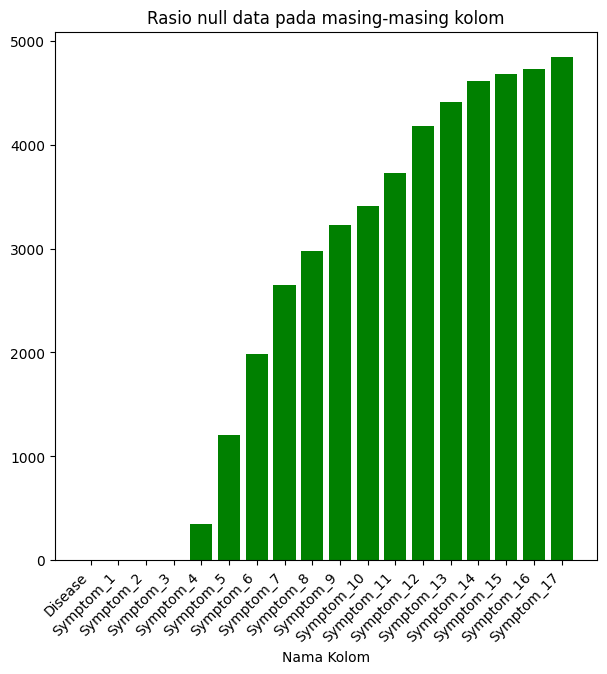

In [82]:
## plot of null value

plt.figure(figsize = (7, 7), dpi = 100)
plt.bar(null_count.index, null_count['jumlah null data'], color = 'green')
plt.xticks(null_count.index, null_count.index, rotation = 45, horizontalalignment = 'right')
plt.title('Rasio null data pada masing-masing kolom')
plt.xlabel('Nama Kolom')
plt.show()

In [83]:
# Rehsape dataframe menjadi array 
kolom = df.columns

data = df[kolom].values.flatten()
reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)
reshaped

df = pd.DataFrame(reshaped, columns = kolom)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Mengisi nilai kosong (NaN) pada setiap kolom menjadi 0
df.fillna(0, inplace = True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
# Menghapus tanda "_" di symtom-severity.csv pada semua nilai di masing-masing kolom menjadi " " (spasi)
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [86]:
print(f"Total Symptom: {len(df1.Symptom.unique())}")
for i in range(len(df1.Symptom.unique())):
    print(f"{i+1}. {df1.Symptom.unique()[i]}")

# df1['Symptom'].unique()

Total Symptom: 132
1. itching
2. skin rash
3. nodal skin eruptions
4. continuous sneezing
5. shivering
6. chills
7. joint pain
8. stomach pain
9. acidity
10. ulcers on tongue
11. muscle wasting
12. vomiting
13. burning micturition
14. spotting urination
15. fatigue
16. weight gain
17. anxiety
18. cold hands and feets
19. mood swings
20. weight loss
21. restlessness
22. lethargy
23. patches in throat
24. irregular sugar level
25. cough
26. high fever
27. sunken eyes
28. breathlessness
29. sweating
30. dehydration
31. indigestion
32. headache
33. yellowish skin
34. dark urine
35. nausea
36. loss of appetite
37. pain behind the eyes
38. back pain
39. constipation
40. abdominal pain
41. diarrhoea
42. mild fever
43. yellow urine
44. yellowing of eyes
45. acute liver failure
46. fluid overload
47. swelling of stomach
48. swelled lymph nodes
49. malaise
50. blurred and distorted vision
51. phlegm
52. throat irritation
53. redness of eyes
54. sinus pressure
55. runny nose
56. congestion
57. ch

In [87]:
# Menguba nama gejala menjadi nilai bobot yang tetera pada symptom-severity.csv

bobot = df.values # Menyimpan nilai dari dataset.csv
symptoms = df1['Symptom'].unique() # Menyimpan nama-nama gejala yang ada pada variabel symptoms

for i in range(len(symptoms)): # membuat perulangan berdasarkan panajang data dari variabel symptom
    bobot[bobot == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0] # mengubah nilai dari gejala menjadi bobot

In [88]:
# membuat dataFrame baru yang sudah gejala penyakit sudah diganti menjadi bobot
df = pd.DataFrame(bobot, columns = kolom)
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,6,4,foul smell of urine,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# mengganti beberapa gejala yang tidak memiliki bobot menjadi 0

df = df.replace('dischromic  patches', 0)
df = df.replace('spotting  urination', 0)
df = df.replace('foul smell of urine', 0)

In [90]:
x = df.iloc[:, 1:].values # Menyimpan nilai Feature (Symptom) dari dataset.csv
y = df.Disease.values # Menyimpan nilai Target (Disease) dari dataset.csv

In [91]:
# Splitting data Traind an testing
# Train data 80%
# Testing data 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)
xtrain = X_train
ytrain = y_train
xtest = X_test
ytest = y_test

In [92]:
# menampilkan shape masing-masing data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3936, 17) (3936,) (984, 17) (984,)


In [93]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [94]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [95]:
#convert integers to dummy variables (i.e. one hot encoded)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [96]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, input_dim = 17, activation = 'relu'),
    tf.keras.layers.Dense(34, activation = 'relu'),
    tf.keras.layers.Dense(34, activation = 'relu'),
    tf.keras.layers.Dense(68, activation = 'relu'),
    tf.keras.layers.Dense(68, activation = 'relu'),
    tf.keras.layers.Dense(136, activation = 'relu'),
    tf.keras.layers.Dense(136, activation = 'relu'),
    tf.keras.layers.Dense(272, activation = 'relu'),
    tf.keras.layers.Dense(272, activation = 'relu'),
    tf.keras.layers.Dense(41, activation = 'sigmoid'),
])

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape = [17]),
#     tf.keras.layers.Dense(17, activation = 'relu'),
#     tf.keras.layers.Dense(17, activation = 'relu'),
#     tf.keras.layers.Dense(34, activation = 'relu'),
#     tf.keras.layers.Dense(34, activation = 'relu'),
#     tf.keras.layers.Dense(68, activation = 'relu'),
#     tf.keras.layers.Dense(68, activation = 'relu'),
#     tf.keras.layers.Dense(136, activation = 'relu'),
#     tf.keras.layers.Dense(136, activation = 'relu'),
#     tf.keras.layers.Dense(41, activation = 'sigmoid'),
# ])

In [97]:
# adam = Adam(learning_rate = 0.005)
# Compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 17)                306       
                                                                 
 dense_31 (Dense)            (None, 34)                612       
                                                                 
 dense_32 (Dense)            (None, 34)                1190      
                                                                 
 dense_33 (Dense)            (None, 68)                2380      
                                                                 
 dense_34 (Dense)            (None, 68)                4692      
                                                                 
 dense_35 (Dense)            (None, 136)               9384      
                                                                 
 dense_36 (Dense)            (None, 136)              

In [99]:
# Mengimport Library OS untuk mengaktifkan Hardware Acceleration menggunakan GPU local
# RTX 3070
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [100]:
history = model.fit(x = X_train, 
          y = y_train, 
          epochs = 100,
          validation_data = (X_test, y_test), 
          verbose = 1
          )

Epoch 1/100
123/123 [==============================] - 1s 5ms/step - loss: 2.1911 - accuracy: 0.3669 - val_loss: 1.2046 - val_accuracy: 0.6199
Epoch 2/100
123/123 [==============================] - 0s 3ms/step - loss: 0.8295 - accuracy: 0.7604 - val_loss: 0.8036 - val_accuracy: 0.7632
Epoch 3/100
123/123 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.8603 - val_loss: 0.4312 - val_accuracy: 0.8608
Epoch 4/100
123/123 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.8951 - val_loss: 0.2711 - val_accuracy: 0.9177
Epoch 5/100
123/123 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.9251 - val_loss: 0.2164 - val_accuracy: 0.9350
Epoch 6/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1826 - accuracy: 0.9403 - val_loss: 0.2643 - val_accuracy: 0.9106
Epoch 7/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1724 - accuracy: 0.9469 - val_loss: 0.1564 - val_accuracy: 0.9533

In [101]:
predictions = model.predict(X_test[:1])

predictions = label_encoder.inverse_transform(np.argmax(predictions, 1))

print(predictions)

1/1 [==============================] - 0s 56ms/step
['Hypertension']


In [102]:
model.save("DiseasePrediction.h5")

In [103]:
# modelnew = tf.keras.models.load_model("DiseasePrediction.h5")

In [104]:
evaluasi = model.evaluate(X_test, y_test)

print(f"Akurasi : {evaluasi[1] * 100} %")
print(f"Loss    : {evaluasi[0] * 100} %")

31/31 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9939
Akurasi : 99.39024448394775 %
Loss    : 1.173486653715372 %


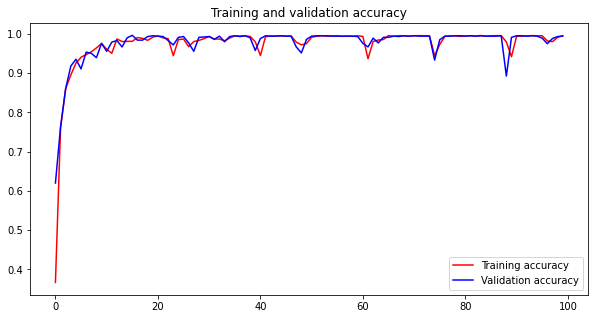

In [105]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize = (10, 5))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

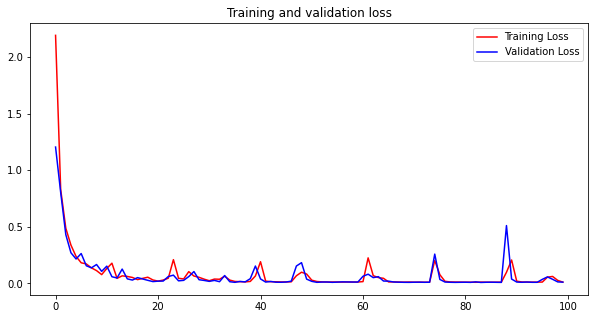

In [106]:
plt.figure(figsize = (10, 5))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [107]:
y_test_arg = np.argmax(y_test, axis = 1)
Y_pred = np.argmax(model.predict(X_test), axis = 1)
Y_pred
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

31/31 [==============================] - 0s 3ms/step
Confusion Matrix
[[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]


In [108]:
# Menampilkan Classification report

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score

y_predicted = np.argmax(model.predict(X_test), axis = 1)
y_test = np.argmax(y_test, axis = 1)

precision = precision_score(y_test, y_predicted,average = 'micro')*100
accuracy = accuracy_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted, average = 'macro') * 100
recall = recall_score(y_test, y_predicted, average = 'macro') * 100

print(f'Accuracy    = {accuracy} %')
print(f'precision   = {precision} %') 
print(f'Recall      = {recall} %')
print(f'F1 Score    = {f1} %')

31/31 [==============================] - 0s 3ms/step
Accuracy    = 99.39024390243902 %
precision   = 99.39024390243902 %
Recall      = 99.39024390243902 %
F1 Score    = 99.39717860475116 %


In [109]:
# Menampilkan data Testing
for i in range(len(X_test[:10])):
    print(X_test[i-0])

[6. 3. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 2. 4. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 5. 4. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 2. 4. 2. 5. 4. 3. 1. 1. 5. 0. 0. 0. 0. 0. 0. 0.]
[2. 2. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 2. 3. 3. 6. 5. 5. 4. 3. 4. 3. 3. 3. 3. 1. 1. 0.]
[0. 3. 1. 2. 3. 3. 3. 3. 3. 5. 4. 1. 0. 0. 0. 0. 0.]
[2. 3. 3. 6. 3. 5. 4. 6. 4. 3. 0. 0. 0. 0. 0. 0. 0.]
[2. 5. 6. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [110]:
# Menampilkan semua hasil prediksi model tensorflow dari data testing x_test

pred = model.predict(X_test[:10])
# pred = np.argmax(pred, axis = 1)
predictions = label_encoder.inverse_transform(np.argmax(pred, 1))
predictions

1/1 [==============================] - 0s 13ms/step


array(['Hypertension', 'Drug Reaction', 'Dimorphic hemmorhoids(piles)',
       'Hyperthyroidism', 'Osteoarthristis', 'Fungal infection',
       'Common Cold', 'Hepatitis B', 'Pneumonia', 'AIDS'], dtype=object)

In [111]:
# Mengubah Kolom Disease menjadi Index pada symptom_Description.csv
df2 = df2.set_index("Disease")

In [112]:
df2.head()

,Description
Disease,
Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
Malaria,An infectious disease caused by protozoan para...
Allergy,An allergy is an immune system response to a f...
Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
Psoriasis,Psoriasis is a common skin disorder that forms...


In [113]:
# Mengubah kolom Disease menjadi index pada symptom_precaution.csv
df3 = df3.set_index("Disease")

In [114]:
df3.head()

,Precaution_1,Precaution_2,Precaution_3,Precaution_4
Disease,,,,
Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


### Tes prediksi model Tensorflow Keras

In [115]:
# Memprediksi penyaskit menggunakan x_test[1]
pred = model.predict(X_test[0:1])
predictions = label_encoder.inverse_transform(np.argmax(pred, 1))
print(f"The Disease is: {predictions[0]} \n")

description = df2.loc[[predictions[0]], 'Description'].values
print(f"Disease Description: \n- {description[0]} \n")

precaution = df3.loc[[str(predictions[0])], ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
print("Precaution: ")
for i in range(4):
    print("-", precaution[0][i])

1/1 [==============================] - 0s 12ms/step
The Disease is: Hypertension 

Disease Description: 
- Hypertension (HTN or HT), also known as high blood pressure (HBP), is a long-term medical condition in which the blood pressure in the arteries is persistently elevated. High blood pressure typically does not cause symptoms. 

Precaution: 
- meditation
- salt baths
- reduce stress
- get proper sleep


In [116]:
# Memprediksi penyaskit menggunakan x_test[1]
pred = model.predict(X_test[1:2])
predictions = label_encoder.inverse_transform(np.argmax(pred, 1))
print(f"The Disease is: {predictions[0]} \n")

description = df2.loc[[predictions[0]], 'Description'].values
print(f"Disease Description: \n- {description[0]} \n")

precaution = df3.loc[[str(predictions[0])], ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
print("Precaution: ")
for i in range(4):
    print("-", precaution[0][i])

1/1 [==============================] - 0s 13ms/step
The Disease is: Drug Reaction 

Disease Description: 
- An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs. 

Precaution: 
- stop irritation
- consult nearest hospital
- stop taking drug
- follow up


In [117]:
# Memprediksi penyaskit menggunakan x_test[1]
pred = model.predict(X_test[2:3])
predictions = label_encoder.inverse_transform(np.argmax(pred, 1))
print(f"The Disease is: {predictions[0]} \n")

description = df2.loc[[predictions[0]], 'Description'].values
print(f"Disease Description: \n- {description[0]} \n")

precaution = df3.loc[[str(predictions[0])], ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
print("Precaution: ")
for i in range(4):
    print("-", precaution[0][i])

1/1 [==============================] - 0s 13ms/step
The Disease is: Dimorphic hemmorhoids(piles) 

Disease Description: 
- Hemorrhoids, also spelled haemorrhoids, are vascular structures in the anal canal. In their ... Other names, Haemorrhoids, piles, hemorrhoidal disease . 

Precaution: 
- avoid fatty spicy food
- consume witch hazel
- warm bath with epsom salt
- consume alovera juice


### GradientBoostingClassifier sebagai pembanding

In [118]:
# Membuat model menggunakan GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score

In [119]:
# # Mengubah nama unique penyakit menjadi integer bersadarkan urutan dari data teratas
# d = {}
# for i, j in zip(df.Disease.unique(), range(len(df.Disease.unique()))):
#     d[i] = j

# df.Disease = df.Disease.map(d)

In [120]:
# # Mengubah sebuah nilai pada semua kolom menjadi integer
# df.astype({'Symptom_1' : 'int64', 'Symptom_2' : 'int64', 'Symptom_3' : 'int64', 'Symptom_4' : 'int64', "Symptom_5" : 'int64', "Symptom_6" : 'int64', "Symptom_7" : 'int64', "Symptom_8" : 'int64', "Symptom_9" : 'int64', "Symptom_10" : 'int64', "Symptom_11" : 'int64', "Symptom_12" : 'int64', "Symptom_13" : 'int64', "Symptom_14" : 'int64', "Symptom_15" : 'int64', "Symptom_16" : 'int64', "Symptom_17" : 'int64'}) 


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,0,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,36,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,37,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,38,6,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,39,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [121]:
# Gradient Boosting Classifier tanpa tuning Hyperparameter
GBC_model = GradientBoostingClassifier()

# Training model
model1 = GBC_model.fit(xtrain, ytrain)

In [122]:
# Menampilkan semua hasil prediksi model Gradient Boosting Classifier dari data testing x_test
model1.predict(xtest)

array(['Hypertension', 'Drug Reaction', 'Dimorphic hemmorhoids(piles)',
       'Hyperthyroidism', 'Osteoarthristis', 'Fungal infection',
       'Common Cold', 'Hepatitis B', 'Pneumonia', 'AIDS', 'Drug Reaction',
       'Dimorphic hemmorhoids(piles)', 'Tuberculosis', 'Hypoglycemia',
       'Pneumonia', 'Gastroenteritis', 'Migraine', 'Diabetes', 'Jaundice',
       'Fungal infection', 'Hepatitis D', 'AIDS',
       'Dimorphic hemmorhoids(piles)', 'AIDS', 'Tuberculosis',
       'Peptic ulcer diseae', 'Common Cold', 'Typhoid', 'Hepatitis E',
       'Hepatitis C', 'Jaundice', 'Osteoarthristis',
       'Peptic ulcer diseae', 'Cervical spondylosis', 'Hypothyroidism',
       'Heart attack', 'Arthritis', 'Cervical spondylosis', 'Hepatitis C',
       'Bronchial Asthma', 'Allergy', 'GERD', 'Varicose veins',
       'Tuberculosis', 'Varicose veins', 'Urinary tract infection',
       'hepatitis A', 'Hepatitis E', 'Impetigo',
       'Paralysis (brain hemorrhage)', 'Varicose veins', 'Hypertension',
    

In [123]:
# Menampilkan Classification report
y_predicted = model1.predict(xtest)

precision = precision_score(ytest, y_predicted,average = 'micro')*100
accuracy = accuracy_score(ytest, y_predicted) * 100
f1 = f1_score(ytest, y_predicted, average = 'macro') * 100
recall = recall_score(ytest, y_predicted, average = 'macro') * 100

print(f'Accuracy    = {accuracy} %')
print(f'precision   = {precision} %') 
print(f'Recall      = {recall} %')
print(f'F1 Score    = {f1} %')

Accuracy    = 99.39024390243902 %
precision   = 99.39024390243902 %
Recall      = 99.39024390243902 %
F1 Score    = 99.39717860475116 %


<AxesSubplot:>

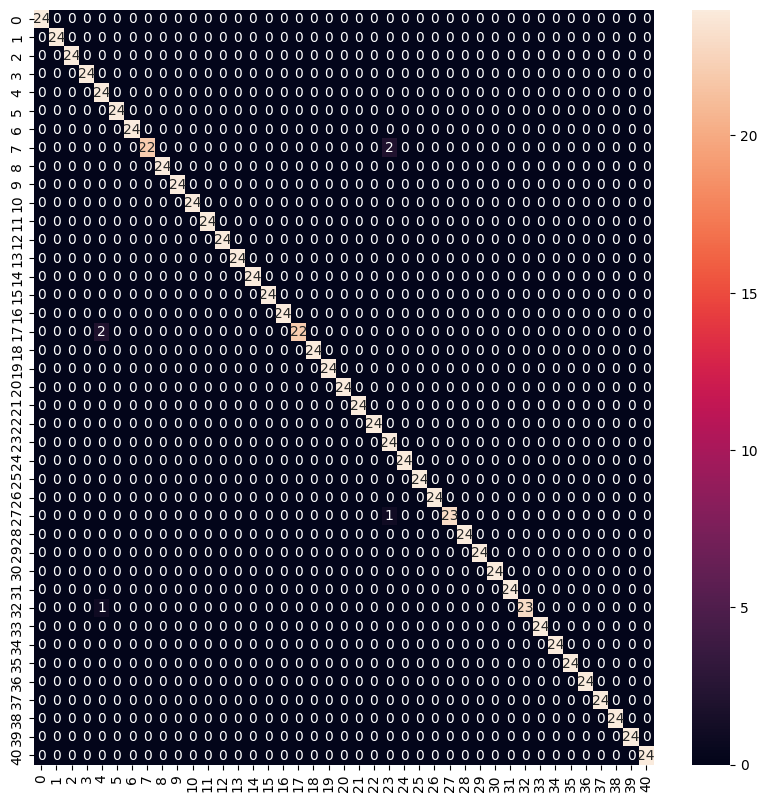

In [124]:
# menampilkan Confusion matrix

plt.figure(figsize = (10, 10), dpi = 100)
    
y_pred = model1.predict(xtest)
y = confusion_matrix(ytest, y_pred)
sns.heatmap(y, annot=True)

In [125]:
disease_name

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

### Tes prediksi model Gradient Boosting Classifier

In [126]:
# Memprediksi penyaskit menggunakan x_test[1]
predict = GBC_model.predict([xtest[1]])
print(f"The Disease is: {predict[0]} \n")

description = df2.loc[predict, 'Description'].values
print(f"Disease Description: \n- {description[0]} \n")

precaution = df3.loc[predict, ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
print("Precaution: ")
for i in range(4):
    print("-", precaution[0][i])

The Disease is: Drug Reaction 

Disease Description: 
- An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs. 

Precaution: 
- stop irritation
- consult nearest hospital
- stop taking drug
- follow up


In [127]:
# Memprediksi penyaskit menggunakan x_test[2]
predict = GBC_model.predict([xtest[2]])
print(f"The Disease is: {predict[0]} \n")

description = df2.loc[predict, 'Description'].values
print(f"Disease Description: \n- {description[0]} \n")

precaution = df3.loc[predict, ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
print("Precaution: ")
for i in range(4):
    print("-", precaution[0][i])

The Disease is: Dimorphic hemmorhoids(piles) 

Disease Description: 
- Hemorrhoids, also spelled haemorrhoids, are vascular structures in the anal canal. In their ... Other names, Haemorrhoids, piles, hemorrhoidal disease . 

Precaution: 
- avoid fatty spicy food
- consume witch hazel
- warm bath with epsom salt
- consume alovera juice


In [128]:
# Memprediksi penyaskit menggunakan x_test[3]
predict = GBC_model.predict([xtest[3]])
print(f"The Disease is: {predict[0]} \n")

description = df2.loc[predict, 'Description'].values
print(f"Disease Description: \n- {description[0]} \n")

precaution = df3.loc[predict, ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
print("Precaution: ")
for i in range(4):
    print("-", precaution[0][i])

The Disease is: Hyperthyroidism 

Disease Description: 
- Hyperthyroidism (overactive thyroid) occurs when your thyroid gland produces too much of the hormone thyroxine. Hyperthyroidism can accelerate your body's metabolism, causing unintentional weight loss and a rapid or irregular heartbeat. 

Precaution: 
- eat healthy
- massage
- use lemon balm
- take radioactive iodine treatment
